# Tarea 1: Perceptrón

**Elaborado por:**
    
- Diego M. Villa Lizárraga, 191343

- Daniela Pinto Veizaga, 191471

**Fecha de entrega:** 29 de enero de 2019

**Materia:** Aprendizaje Profundo 2020

---------------------------------------------------------------------------------------------------------------------

### Generalidades:


Base de datos iris contiene 

- *150* observaciones de tres especies diferentes de flores: 'setosa', 'versicolor', 'virginica' 
- *4* variables (alto del pétalo, largo del pétalo, alto del sépalo y largo del sépalo)


### Parte 1: Datos

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
Y = iris.target

print("Data:", X.shape)
print(X[:10])
print("Labels", Y.shape)
print(Y)


Data: (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
Labels (150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [3]:
# More data info
#iris.DESCR

In [4]:
# More data info

iris.target_names


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
# Let's keep two classes only, and two variables
X = X[:100, :2]
Y = Y[:100]

print("Data:", X.shape)
print(X[:10])
print("Labels", Y.shape)
print(Y)

Data: (100, 2)
[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]]
Labels (100,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [7]:
# Converting data to data frame

from __future__ import absolute_import, division, print_function, unicode_literals

import pandas as pd

In [8]:

df=pd.DataFrame(iris.data)
df.columns = ['sepal length (cm)','sepal width (cm)','petal length (cm)',
                     'petal width (cm)']
df.insert(0,'species',iris.target, True) 

df.tail()

,species,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,2,6.7,3.0,5.2,2.3
146,2,6.3,2.5,5.0,1.9
147,2,6.5,3.0,5.2,2.0
148,2,6.2,3.4,5.4,2.3
149,2,5.9,3.0,5.1,1.8


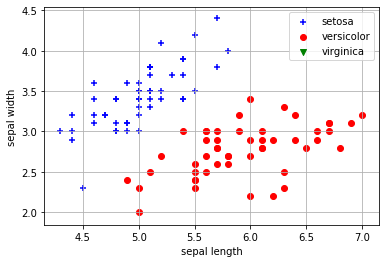

In [9]:
# Plot it - Sepal Data
plt.scatter(X[Y==0, 0], X[Y==0, 1], c='b', marker='+', label='setosa')
plt.scatter(X[Y==1, 0], X[Y==1, 1], c='r', label='versicolor')
plt.scatter(X[Y==2, 0], X[Y==2, 1], c='g', marker='v', label='virginica')

plt.legend()
plt.grid(True)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

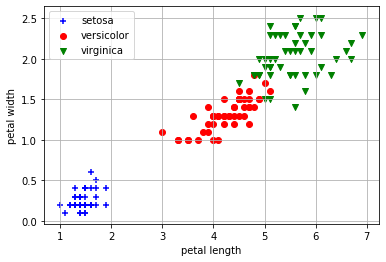

In [10]:
# Plot it- Petal Data
X_a = iris.data
Y_a = iris.target


plt.scatter(X_a[Y_a==0, 2], X_a[Y_a==0, 3], c='b', marker='+', label='setosa')
plt.scatter(X_a[Y_a==1, 2], X_a[Y_a==1, 3], c='r', label='versicolor')
plt.scatter(X_a[Y_a==2, 2], X_a[Y_a==2, 3], c='g', marker='v', label='virginica')

plt.legend()
plt.grid(True)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

__________________________________________________________________________________________________________________

### Pregunta 1:
#### Diseña alguna manera de visualizar y diferenciar las 4 dimensiones de los datos usando una gráfica de sólo 2-D



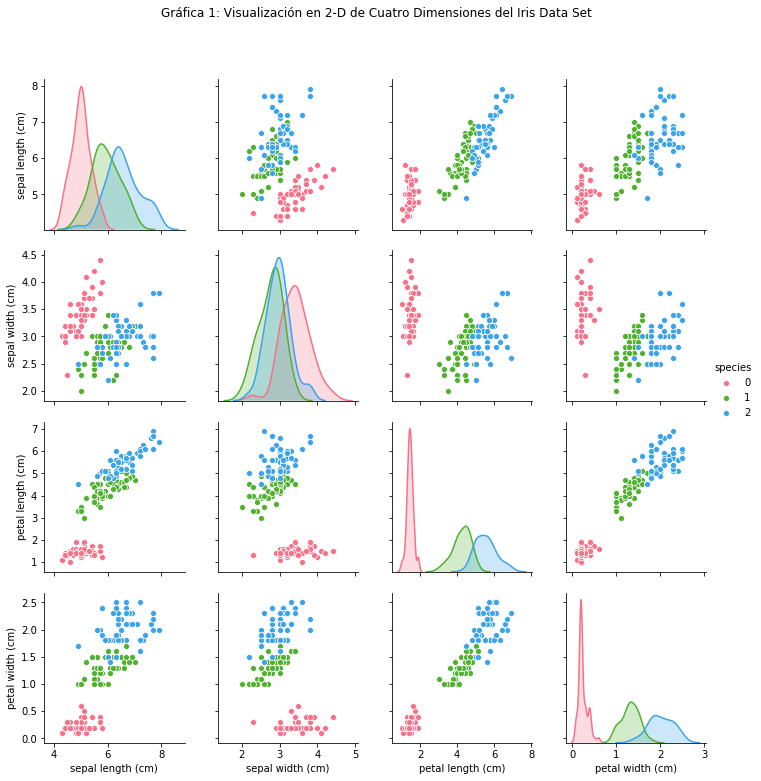

In [11]:
# We use the seaborn library
import seaborn as sns

g=sns.pairplot(df, vars=['sepal length (cm)','sepal width (cm)','petal length (cm)',
                     'petal width (cm)'], hue= 'species', palette="husl")
g.fig.suptitle("Gráfica 1: Visualización en 2-D de Cuatro Dimensiones del Iris Data Set", y=1.08) # y= some height>1

plt.show()


Al identificar las distintas variables por especie, vemos que las especies están caracterizadas de manera más o menos única.

__________________________________________________________________________________________________________________

In [12]:
# Split data into training + validation and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 2)
(20, 2)
(80,)
(20,)


### Parte 2: Perceptron

In [13]:
# More imports to compute accuracy

from sklearn.metrics import accuracy_score

In [14]:
# Define class linear (step) perceptron
class LPerceptron:
    
    #constructor
    def __init__ (self):
        self.w = None
        self.b = None
    
    #activation function  
    def activation(self, x):
        return 1 if (np.dot(self.w, x) >= self.b) else 0
    
    #predict on data
    def predict(self, X):
        Y = []
        for x in X:
            result = self.activation(x)
            Y.append(result)
        return np.array(Y)

    #train
    def fit(self, X, Y, n_epochs=1, lr=1, val_split=0.1):
        x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=val_split) #split train into train and val
        
        self.w = np.random.rand(X.shape[1])
        self.b = 0.0
        
        accuracy = np.zeros((2,))
        accuracy[0] = accuracy_score(y_train, self.predict(x_train))
        accuracy[1] = accuracy_score(y_val, self.predict(x_val))
        print(f"Epoch: {0:3d} -- acc: {accuracy[0]:6.4f}, acc_val: {accuracy[1]:6.4f}")
        
        accuracy = np.zeros((n_epochs, 2))
        for epoch in range(n_epochs): #loop through epochs
            for x, y in zip(x_train, y_train):  #loop through samples
                y_pred = self.activation(x)
                err = y - y_pred
                self.w = self.w + lr * err * x  #LA
                self.b = self.b + lr * err      #LB
            accuracy[epoch, 0] = accuracy_score(y_train, self.predict(x_train))
            accuracy[epoch, 1] = accuracy_score(y_val, self.predict(x_val))
            #print(f"Epoch: {epoch+1:3d} -- acc: {accuracy[epoch, 0]:6.4f}, acc_val: {accuracy[epoch, 1]:6.4f}")
            
        return accuracy

__________________________________________________________________________________________________________________

###  Pregunta 2:
#### Explica qué sucede en las líneas comentadas como #LA y #LB.

En las líneas comentadas se actualizan de los valores de las omegas ($\omega_{o}$, omega inicial) y el bias ($b$). Para dichas actualizacones se emplea el método del `gradiente descendente`.

En específico: 

+ la línea LA hace referencia a la actualización de los pesos $w$ mediante la siguiente ecuación: $w^{(k+1)}=w^{(k)}+ err_{i}*lr*x_{i}$.
+ la linea LB hace referencia a la actualización del término del sesgo ($bias$) a través de la siguiente ecuación: $b^{(k+1)}=b^{(k)}+ lr*err_{i}$. 


#### ¿Qué significa cada térmido de las ecuaciones?

+ $lr$: learning rate, tasa de aprendizaje. 
+ $w$: peso
+ $err$: error (Diferencia entre predicción y etiqueta real)
+ $b$: sesgo
+ $x$: predictor
 
#### ¿Por qué contienen el término de la variable "err"?

El descenso del gradiente se calcula de la siguiente forma: $w^{j+1}=w^{j}+ \eta \frac{\partial E}{\partial w^{j}}$, mediante la cuál se calcula:

+  $\hat{y}$: (en el fowardpass)
+ E: (en el bakcpropagation)
+ $\frac{\partial E}{\partial w^{j}}$: (en el backpropagation)
+ y ajusta $w^{(j)}$: (en el backpropagation.

En este sentido, a través de este método se busca minimizar el error (la función de pérdida) entre la predicción ($\hat{y}$) y el valor real ($y$). Por ello, se incluye $E$ para que pondere/impacte de cierta forma el ajuste del peso y el sesgo.


#### ¿Por qué contienen como un término la variable de entrada "x"?


Intuitivamente, la variable de entrada x aparece porque con cada actualización (usando gradient descent), se van a ir modificando los datos contenidos en la variable de entrada $x$.

Matematicamente, lo anterior sucede porque sabemos que por la regla de la cadena:

$$\frac{\partial E}{\partial w^{j}}= \frac{\partial E}{\partial \hat{y}}*
 \frac{\hat{y}}{w^{j}}$$


Donde:
    
+ $\frac{\partial E}{\partial w^{(0)}}=-1$
+ $\frac{\partial E}{\partial w^{j}}= -x^{(j)}$

__________________________________________________________________________________________________________________

In [15]:
# Create model and train it for 50 epochs
np.random.seed(1222)
perceptron = LPerceptron()
acc_history = perceptron.fit(x_train, y_train, n_epochs=50, lr=0.3, val_split=0.1) #validation split del 10 por ciento

Epoch:   0 -- acc: 0.4861, acc_val: 0.5000


In [16]:
# Making predictions on test data
y_test_hat = perceptron.predict(x_test)
print("Test acc:", accuracy_score(y_test_hat, y_test))

Test acc: 0.9


In [17]:
# Show the final values for the weights and bias
print("Weights:", perceptron.w)
print("bias:", perceptron.b)

Weights: [  9.03450496 -20.47760384]
bias: -5.699999999999998


__________________________________________________________________________________________________________________

### Pregunta 3:

Corre el experimento anterior 100 veces (quizás quieras comentar las impresiones parciales) y reporta
el promedio +- desviación estándar obtenido en la última época de cada corrida.

Debes reportar 3 promedios: para training, validation, y test sets.

__________________________________________________________________________________________________________________

In [18]:
import random
np.random.seed(1222)
ACC = np.zeros((100, 3))
for ind in range(100):
    print("="*110) 
    print( "Experimento número ",ind +1)
    print("="*110)
    perceptron = LPerceptron()
    acc_history = perceptron.fit(x_train, y_train, n_epochs=50, lr=0.3, val_split=0.1)
    ACC[ind, 0], ACC[ind, 1] = acc_history[-1]
    y_test_hat = perceptron.predict(x_test)
    ACC[ind, 2] = accuracy_score(y_test_hat, y_test)
    print("-"*110)
    print( "Promedio +- desviación estándar del experimento número",ind +1,":")
    print(f"Training:\t {ACC[:, 0].mean():6.4f} +- {ACC[:, 0].std():6.4f}")
    print(f"Validation:\t {ACC[:, 1].mean():6.4f} +- {ACC[:, 1].std():6.4f}")
    print(f"Test:\t\t {ACC[:, 2].mean():6.4f} +- {ACC[:, 2].std():6.4f}")




Experimento número  1
Epoch:   0 -- acc: 0.4861, acc_val: 0.5000
--------------------------------------------------------------------------------------------------------------
Promedio +- desviación estándar del experimento número 1 :
Training:	 0.0083 +- 0.0829
Validation:	 0.0088 +- 0.0871
Test:		 0.0090 +- 0.0895
Experimento número  2
Epoch:   0 -- acc: 0.4583, acc_val: 0.7500
--------------------------------------------------------------------------------------------------------------
Promedio +- desviación estándar del experimento número 2 :
Training:	 0.0181 +- 0.1268
Validation:	 0.0187 +- 0.1315
Test:		 0.0190 +- 0.1332
Experimento número  3
Epoch:   0 -- acc: 0.5000, acc_val: 0.3750
--------------------------------------------------------------------------------------------------------------
Promedio +- desviación estándar del experimento número 3 :
Training:	 0.0278 +- 0.1584
Validation:	 0.0288 +- 0.1638
Test:		 0.0290 +- 0.1651
Experimento número  4
Epoch:   0 -- acc: 0.486

--------------------------------------------------------------------------------------------------------------
Promedio +- desviación estándar del experimento número 16 :
Training:	 0.1454 +- 0.3361
Validation:	 0.1475 +- 0.3420
Test:		 0.1510 +- 0.3491
Experimento número  17
Epoch:   0 -- acc: 0.5139, acc_val: 0.2500
--------------------------------------------------------------------------------------------------------------
Promedio +- desviación estándar del experimento número 17 :
Training:	 0.1554 +- 0.3464
Validation:	 0.1562 +- 0.3493
Test:		 0.1610 +- 0.3588
Experimento número  18
Epoch:   0 -- acc: 0.4861, acc_val: 0.5000
--------------------------------------------------------------------------------------------------------------
Promedio +- desviación estándar del experimento número 18 :
Training:	 0.1650 +- 0.3551
Validation:	 0.1663 +- 0.3588
Test:		 0.1710 +- 0.3680
Experimento número  19
Epoch:   0 -- acc: 0.5000, acc_val: 0.3750
----------------------------------------

--------------------------------------------------------------------------------------------------------------
Promedio +- desviación estándar del experimento número 32 :
Training:	 0.2992 +- 0.4391
Validation:	 0.3013 +- 0.4437
Test:		 0.3080 +- 0.4524
Experimento número  33
Epoch:   0 -- acc: 0.4583, acc_val: 0.7500
--------------------------------------------------------------------------------------------------------------
Promedio +- desviación estándar del experimento número 33 :
Training:	 0.3083 +- 0.4423
Validation:	 0.3100 +- 0.4463
Test:		 0.3175 +- 0.4558
Experimento número  34
Epoch:   0 -- acc: 0.4722, acc_val: 0.6250
--------------------------------------------------------------------------------------------------------------
Promedio +- desviación estándar del experimento número 34 :
Training:	 0.3179 +- 0.4459
Validation:	 0.3200 +- 0.4505
Test:		 0.3275 +- 0.4597
Experimento número  35
Epoch:   0 -- acc: 0.4861, acc_val: 0.5000
----------------------------------------

--------------------------------------------------------------------------------------------------------------
Promedio +- desviación estándar del experimento número 48 :
Training:	 0.4511 +- 0.4728
Validation:	 0.4537 +- 0.4775
Test:		 0.4640 +- 0.4870
Experimento número  49
Epoch:   0 -- acc: 0.4861, acc_val: 0.5000
--------------------------------------------------------------------------------------------------------------
Promedio +- desviación estándar del experimento número 49 :
Training:	 0.4606 +- 0.4731
Validation:	 0.4637 +- 0.4784
Test:		 0.4740 +- 0.4877
Experimento número  50
Epoch:   0 -- acc: 0.4583, acc_val: 0.7500
--------------------------------------------------------------------------------------------------------------
Promedio +- desviación estándar del experimento número 50 :
Training:	 0.4701 +- 0.4734
Validation:	 0.4738 +- 0.4790
Test:		 0.4840 +- 0.4881
Experimento número  51
Epoch:   0 -- acc: 0.5000, acc_val: 0.3750
----------------------------------------

--------------------------------------------------------------------------------------------------------------
Promedio +- desviación estándar del experimento número 64 :
Training:	 0.6024 +- 0.4558
Validation:	 0.6038 +- 0.4600
Test:		 0.6185 +- 0.4694
Experimento número  65
Epoch:   0 -- acc: 0.5000, acc_val: 0.3750
--------------------------------------------------------------------------------------------------------------
Promedio +- desviación estándar del experimento número 65 :
Training:	 0.6121 +- 0.4532
Validation:	 0.6138 +- 0.4576
Test:		 0.6285 +- 0.4668
Experimento número  66
Epoch:   0 -- acc: 0.4722, acc_val: 0.6250
--------------------------------------------------------------------------------------------------------------
Promedio +- desviación estándar del experimento número 66 :
Training:	 0.6217 +- 0.4503
Validation:	 0.6238 +- 0.4550
Test:		 0.6385 +- 0.4639
Experimento número  67
Epoch:   0 -- acc: 0.4861, acc_val: 0.5000
----------------------------------------

--------------------------------------------------------------------------------------------------------------
Promedio +- desviación estándar del experimento número 80 :
Training:	 0.7543 +- 0.3824
Validation:	 0.7562 +- 0.3879
Test:		 0.7765 +- 0.3952
Experimento número  81
Epoch:   0 -- acc: 0.4722, acc_val: 0.6250
--------------------------------------------------------------------------------------------------------------
Promedio +- desviación estándar del experimento número 81 :
Training:	 0.7642 +- 0.3755
Validation:	 0.7662 +- 0.3811
Test:		 0.7865 +- 0.3880
Experimento número  82
Epoch:   0 -- acc: 0.4861, acc_val: 0.5000
--------------------------------------------------------------------------------------------------------------
Promedio +- desviación estándar del experimento número 82 :
Training:	 0.7740 +- 0.3681
Validation:	 0.7762 +- 0.3739
Test:		 0.7965 +- 0.3804
Experimento número  83
Epoch:   0 -- acc: 0.5000, acc_val: 0.3750
----------------------------------------

--------------------------------------------------------------------------------------------------------------
Promedio +- desviación estándar del experimento número 96 :
Training:	 0.9064 +- 0.1967
Validation:	 0.9062 +- 0.2057
Test:		 0.9330 +- 0.2051
Experimento número  97
Epoch:   0 -- acc: 0.4583, acc_val: 0.7500
--------------------------------------------------------------------------------------------------------------
Promedio +- desviación estándar del experimento número 97 :
Training:	 0.9161 +- 0.1745
Validation:	 0.9163 +- 0.1846
Test:		 0.9430 +- 0.1825
Experimento número  98
Epoch:   0 -- acc: 0.4861, acc_val: 0.5000
--------------------------------------------------------------------------------------------------------------
Promedio +- desviación estándar del experimento número 98 :
Training:	 0.9254 +- 0.1482
Validation:	 0.9263 +- 0.1602
Test:		 0.9530 +- 0.1560
Experimento número  99
Epoch:   0 -- acc: 0.4583, acc_val: 0.7500
----------------------------------------

|Data Set /Número de Experimento|Experimento 1        	| Experimento 100	|
|--|------------------	|----------	|
|Training: | 0.0088 +- 0.0871 	|0.9425 +- 0.0736|
|Validation| 0.0063 +- 0.0622|  0.9313 +- 0.1267
|
|Test| 0.0095 +- 0.0945       	|0.9650 +- 0.0783


**¿Notas algún cambio significativo?**

+ Comentarios impresiones parciales:

En general se obtiene una mejor precisión en las ultimas epocas (Epoch 50), para todos lo *sets*.

Se observa un compartamiento creciente mas marcado en la precisión del training que en el de validation.

Como se puede observar en la tabla anterior, las promedios a lo largo de los experimentos (para todos los *sets*: training, validation, test) van aumentando de manera más o menos uniforme y constante, mientras que las desviaciones estándares disminuyen.

+ Cambios:

En general el promedio de precisión para el training, validation y test es mayor o igual al 95%.

El promedio de precisión es mayor para el *test set*.

El promedio de precisión del *training set* y el *validation set* es muy similar, sin embargo el *validation set* tiene una variabilidad mayor.

__________________________________________________________________________________________________________________

### Pregunta 4

Repite el experimento anterior pero ahora usando las 4 variables de los datos (en vez de sólo 2)


__________________________________________________________________________________________________________________

In [19]:
X = iris.data[:100] # cambio para la inclusión de las cuatros variables
Y = iris.target[:100]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
np.random.seed(1222)
ACC = np.zeros((100, 3))
for ind in range(100):
    print("="*110) 
    print( "Experimento número ",ind+1)
    print("="*110)
    perceptron = LPerceptron()
    acc_history = perceptron.fit(x_train, y_train, n_epochs=50, lr=0.3, val_split=0.1)
    ACC[ind, 0], ACC[ind, 1] = acc_history[-1]
    y_test_hat = perceptron.predict(x_test)
    ACC[ind, 2] = accuracy_score(y_test_hat, y_test)
    print("-"*110)
    print( "Promedio +- desviación estándar del experimento número",ind+1,":")
    print(f"Training:\t {ACC[:, 0].mean():6.4f} +- {ACC[:, 0].std():6.4f}")
    print(f"Validation:\t {ACC[:, 1].mean():6.4f} +- {ACC[:, 1].std():6.4f}")
    print(f"Test:\t\t {ACC[:, 2].mean():6.4f} +- {ACC[:, 2].std():6.4f}")

Experimento número  1
Epoch:   0 -- acc: 0.4583, acc_val: 0.6250
--------------------------------------------------------------------------------------------------------------
Promedio +- desviación estándar del experimento número 1 :
Training:	 0.0100 +- 0.0995
Validation:	 0.0100 +- 0.0995
Test:		 0.0100 +- 0.0995
Experimento número  2
Epoch:   0 -- acc: 0.4583, acc_val: 0.6250
--------------------------------------------------------------------------------------------------------------
Promedio +- desviación estándar del experimento número 2 :
Training:	 0.0200 +- 0.1400
Validation:	 0.0200 +- 0.1400
Test:		 0.0200 +- 0.1400
Experimento número  3
Epoch:   0 -- acc: 0.4861, acc_val: 0.3750
--------------------------------------------------------------------------------------------------------------
Promedio +- desviación estándar del experimento número 3 :
Training:	 0.0300 +- 0.1706
Validation:	 0.0300 +- 0.1706
Test:		 0.0290 +- 0.1651
Experimento número  4
Epoch:   0 -- acc: 0.472

--------------------------------------------------------------------------------------------------------------
Promedio +- desviación estándar del experimento número 16 :
Training:	 0.1600 +- 0.3666
Validation:	 0.1600 +- 0.3666
Test:		 0.1590 +- 0.3644
Experimento número  17
Epoch:   0 -- acc: 0.4722, acc_val: 0.5000
--------------------------------------------------------------------------------------------------------------
Promedio +- desviación estándar del experimento número 17 :
Training:	 0.1700 +- 0.3756
Validation:	 0.1700 +- 0.3756
Test:		 0.1690 +- 0.3735
Experimento número  18
Epoch:   0 -- acc: 0.4444, acc_val: 0.7500
--------------------------------------------------------------------------------------------------------------
Promedio +- desviación estándar del experimento número 18 :
Training:	 0.1800 +- 0.3842
Validation:	 0.1800 +- 0.3842
Test:		 0.1790 +- 0.3822
Experimento número  19
Epoch:   0 -- acc: 0.4722, acc_val: 0.5000
----------------------------------------

--------------------------------------------------------------------------------------------------------------
Promedio +- desviación estándar del experimento número 32 :
Training:	 0.3200 +- 0.4665
Validation:	 0.3200 +- 0.4665
Test:		 0.3190 +- 0.4651
Experimento número  33
Epoch:   0 -- acc: 0.4861, acc_val: 0.3750
--------------------------------------------------------------------------------------------------------------
Promedio +- desviación estándar del experimento número 33 :
Training:	 0.3300 +- 0.4702
Validation:	 0.3300 +- 0.4702
Test:		 0.3290 +- 0.4689
Experimento número  34
Epoch:   0 -- acc: 0.4306, acc_val: 0.8750
--------------------------------------------------------------------------------------------------------------
Promedio +- desviación estándar del experimento número 34 :
Training:	 0.3400 +- 0.4737
Validation:	 0.3400 +- 0.4737
Test:		 0.3390 +- 0.4724
Experimento número  35
Epoch:   0 -- acc: 0.4583, acc_val: 0.6250
----------------------------------------

--------------------------------------------------------------------------------------------------------------
Promedio +- desviación estándar del experimento número 48 :
Training:	 0.4800 +- 0.4996
Validation:	 0.4800 +- 0.4996
Test:		 0.4790 +- 0.4987
Experimento número  49
Epoch:   0 -- acc: 0.4722, acc_val: 0.5000
--------------------------------------------------------------------------------------------------------------
Promedio +- desviación estándar del experimento número 49 :
Training:	 0.4900 +- 0.4999
Validation:	 0.4900 +- 0.4999
Test:		 0.4890 +- 0.4990
Experimento número  50
Epoch:   0 -- acc: 0.4583, acc_val: 0.6250
--------------------------------------------------------------------------------------------------------------
Promedio +- desviación estándar del experimento número 50 :
Training:	 0.5000 +- 0.5000
Validation:	 0.5000 +- 0.5000
Test:		 0.4990 +- 0.4991
Experimento número  51
Epoch:   0 -- acc: 0.4861, acc_val: 0.3750
----------------------------------------

--------------------------------------------------------------------------------------------------------------
Promedio +- desviación estándar del experimento número 64 :
Training:	 0.6400 +- 0.4800
Validation:	 0.6400 +- 0.4800
Test:		 0.6390 +- 0.4794
Experimento número  65
Epoch:   0 -- acc: 0.4722, acc_val: 0.5000
--------------------------------------------------------------------------------------------------------------
Promedio +- desviación estándar del experimento número 65 :
Training:	 0.6500 +- 0.4770
Validation:	 0.6500 +- 0.4770
Test:		 0.6490 +- 0.4763
Experimento número  66
Epoch:   0 -- acc: 0.4722, acc_val: 0.5000
--------------------------------------------------------------------------------------------------------------
Promedio +- desviación estándar del experimento número 66 :
Training:	 0.6600 +- 0.4737
Validation:	 0.6600 +- 0.4737
Test:		 0.6590 +- 0.4731
Experimento número  67
Epoch:   0 -- acc: 0.4722, acc_val: 0.5000
----------------------------------------

--------------------------------------------------------------------------------------------------------------
Promedio +- desviación estándar del experimento número 80 :
Training:	 0.8000 +- 0.4000
Validation:	 0.7987 +- 0.3996
Test:		 0.7990 +- 0.3996
Experimento número  81
Epoch:   0 -- acc: 0.4722, acc_val: 0.5000
--------------------------------------------------------------------------------------------------------------
Promedio +- desviación estándar del experimento número 81 :
Training:	 0.8100 +- 0.3923
Validation:	 0.8087 +- 0.3919
Test:		 0.8090 +- 0.3919
Experimento número  82
Epoch:   0 -- acc: 0.4722, acc_val: 0.5000
--------------------------------------------------------------------------------------------------------------
Promedio +- desviación estándar del experimento número 82 :
Training:	 0.8200 +- 0.3842
Validation:	 0.8187 +- 0.3838
Test:		 0.8190 +- 0.3838
Experimento número  83
Epoch:   0 -- acc: 0.5000, acc_val: 0.2500
----------------------------------------

--------------------------------------------------------------------------------------------------------------
Promedio +- desviación estándar del experimento número 96 :
Training:	 0.9600 +- 0.1960
Validation:	 0.9587 +- 0.1961
Test:		 0.9590 +- 0.1960
Experimento número  97
Epoch:   0 -- acc: 0.4722, acc_val: 0.5000
--------------------------------------------------------------------------------------------------------------
Promedio +- desviación estándar del experimento número 97 :
Training:	 0.9700 +- 0.1706
Validation:	 0.9688 +- 0.1708
Test:		 0.9690 +- 0.1707
Experimento número  98
Epoch:   0 -- acc: 0.4722, acc_val: 0.5000
--------------------------------------------------------------------------------------------------------------
Promedio +- desviación estándar del experimento número 98 :
Training:	 0.9800 +- 0.1400
Validation:	 0.9788 +- 0.1404
Test:		 0.9790 +- 0.1402
Experimento número  99
Epoch:   0 -- acc: 0.4444, acc_val: 0.7500
----------------------------------------

|Promedios/Número de Experimento|Experimento 1       	| Experimento 100	|
|--|------------------	|----------	|
|Training: | 0.0100 +- 0.0995 	| 1.0000 +- 0.0000 	|
|Validation| 0.0100 +- 0.0995 | 0.9988 +- 0.0124|
|Test| 0.0100 +- 0.0995       	|  1.0000 +- 0.0000|

- **Hubo algún cambio significativo en los resultados obtenidos?**


Sí, los cambios fueron significativos: se aumentó la precisión promedio ($\mu$) de los distintos conjuntos de datos, acercándose a resulatos de precisión casi perfecta, disminuyendo a la par la desviación estándar ($\sigma$). 


Además, se observa que la precisión tanto para training como para validation alcanza el 100% en las primeras epocas para todas las iteraciones.

- **¿Por qué crees que fue esto?**

Inclusión de dos variables que previamente fueron omitidas y que sin embargo caracterizan de mejor manera a los diferentes tipos de  flores iris. Es decir, con la inclusión de estas dos características, el modelo de redes neuronales aprende más y mejora sus niveles de precisión.

- **¿Por qué si modificamos los datos, seguimos usando las mismas etiquetas: $Y = iris.target[:100]$?**

El vector $Y$, es el vector que contiene las etiquetas de las tres especies de flores iris: las primeras 50 observaciones corresponden a a la clase *iris setosa*, los 50 siguientes a la clase *iris versicolor* y los últimos 50 registros a *iris virginica*. De esta manera, al seguir trabajando únicamente con la clasificación de dos tipos de flores, es correcto continuar empleando únicamente las primeras 100 etiquetas ($Y=iris.target[:100]$. 

Sin embargo, como la instrucción del ejercicio fue emplear las cuatro variables de los datos, en lugar de sólo dos, entonces fue necesario proceder a la modificación de la matrix X, misma que sufrió el siguiente cambio: $X = iris.data[:100, 2]$ $\to$ $X = iris.data[:100]$.

__________________________________________________________________________________________________________________

### Pregunta 5

Repite el experimento anterior pero ahora usando las 4 variables de las clases versicolor (1) y virginica (2)

__________________________________________________________________________________________________________________

In [20]:

np.random.seed(1222)

X = iris.data[50:]
Y = iris.target[:100] 

# hacer la conversión de etiquetas para que perceptrón los mapee bien:
#for y in Y:

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


ACC = np.zeros((100, 3))
for ind in range(100):
    perceptron = LPerceptron()
    acc_history = perceptron.fit(x_train, y_train, n_epochs=50, lr=0.3, val_split=0.1)
    ACC[ind, 0], ACC[ind, 1] = acc_history[-1]
    y_test_hat = perceptron.predict(x_test)
    ACC[ind, 2] = accuracy_score(y_test_hat, y_test)
    
print(f"Training:\t {ACC[:, 0].mean():6.4f} +- {ACC[:, 0].std():6.4f}")
print(f"Validation:\t {ACC[:, 1].mean():6.4f} +- {ACC[:, 1].std():6.4f}")
print(f"Test:\t\t {ACC[:, 2].mean():6.4f} +- {ACC[:, 2].std():6.4f}")

Epoch:   0 -- acc: 0.5278, acc_val: 0.2500
Epoch:   0 -- acc: 0.4861, acc_val: 0.6250
Epoch:   0 -- acc: 0.4861, acc_val: 0.6250
Epoch:   0 -- acc: 0.5139, acc_val: 0.3750
Epoch:   0 -- acc: 0.5278, acc_val: 0.2500
Epoch:   0 -- acc: 0.4722, acc_val: 0.7500
Epoch:   0 -- acc: 0.4722, acc_val: 0.7500
Epoch:   0 -- acc: 0.5139, acc_val: 0.3750
Epoch:   0 -- acc: 0.5278, acc_val: 0.2500
Epoch:   0 -- acc: 0.5417, acc_val: 0.1250
Epoch:   0 -- acc: 0.5278, acc_val: 0.2500
Epoch:   0 -- acc: 0.4861, acc_val: 0.6250
Epoch:   0 -- acc: 0.5139, acc_val: 0.3750
Epoch:   0 -- acc: 0.5139, acc_val: 0.3750
Epoch:   0 -- acc: 0.5000, acc_val: 0.5000
Epoch:   0 -- acc: 0.4861, acc_val: 0.6250
Epoch:   0 -- acc: 0.4861, acc_val: 0.6250
Epoch:   0 -- acc: 0.4861, acc_val: 0.6250
Epoch:   0 -- acc: 0.4861, acc_val: 0.6250
Epoch:   0 -- acc: 0.5000, acc_val: 0.5000
Epoch:   0 -- acc: 0.5139, acc_val: 0.3750
Epoch:   0 -- acc: 0.5278, acc_val: 0.2500
Epoch:   0 -- acc: 0.5139, acc_val: 0.3750
Epoch:   0 

|Promedios/Número de Experimento|Experimento 1       	| Experimento 100	|
|--|------------------	|----------	|
|Training: |  0.0089 +- 0.0884 	|  0.8839 +- 0.0869
|
|Validation| 0.0100 +- 0.0995|  0.8738 +- 0.1192|
|Test| 0.0090 +- 0.0895    	|  0.8460 +- 0.0961|

- **¿Hubo algún cambio significativo en los resultados obtenidos?**

Sí, se obtuvo una menor precisión y mayor desviación para todos los casos.

- **¿Por qué crees que fue esto?**

Como se observa en las "Gráfica 1: Visualización en 2-D de Cuatro Dimensiones del Iris Data Set", las clases $iris.versicolor$ e $iris.virginica$ comparten características similares para las variables asociadas a los sépalos y los pétalos, lo que hace resulta en un problema de clasificación más complejo para una red neuronal con función de activación de tipo perceptrón.


- **¿Por qué si modificamos los datos, seguimos usando las mismas etiquetas: $Y = iris.target[:100]$?**

Como se mencionó anteriormente, se modificó la matriz $X$, de la siguiente manera $X = iris.data[50:, :4]$, a fin de considerar las observaciones correspondientes a las dos clases en cuestión $iris.versicolor$ e $iris.virginica$ .

Sin embargo, si bien es cierto que las etiquetas correspondientes a estas dos especies se encuentran en el vector que se define de la siguiente manera: $Y = iris.target[50:]$, el empleo de estos datos conllevaría a la redefinición de las etiquetas (la etiqueta de 1 para versicolor, correspondeinte a la etiqueta original, y la etiqueta 0 para virginica, originalmente 2) que permita  al perceptrón realizar el mapeo adecuado de 0 a 1. 

Para ahorrarnos esta transformación, se conservó las etiquetas originales, Y = iris.target[:100].


### Part 3: Non-linear (sigmoid) Perceptron

__________________________________________________________________________________________________________________

### Pregunta 6:

Completa el siguiente código del perceptron no lineal (sigmoide)

__________________________________________________________________________________________________________________

In [21]:
# Define class perceptron
class Perceptron:
    
    #constructor
    def __init__ (self):
        self.W = None
        self.b = None
    
    #total neuron input
    def lin_sum(self, X):
        return np.dot(self.W, X) + self.b
    
    #activation (sigmoid)
    def sigmoid(self, s):
        return 1.0 / (1.0 + np.exp(-s))
    
    #derivative of activation (sigmoid)
    def d_sigmoid(self, s):
        return self.sigmoid(s) * (1.0 - self.sigmoid(s))
    
    #predict on data
    def predict(self, X):
        Y = []
        for x in X:
            s = self.lin_sum(x)
            y = self.sigmoid(s)
            Y.append(y)
        return np.array(Y)

    #train
    def fit(self, X, Y, n_epochs=1, lr=0.1, val_split=0.1):
        x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=val_split)
        
        self.W = np.random.rand(X.shape[1])
        self.b = 0.0
        
        accuracy = np.zeros((2,))
        accuracy[0] = accuracy_score(y_train, self.predict(x_train).round())
        accuracy[1] = accuracy_score(y_val, self.predict(x_val).round())
        #print(f"Epoch: {0:3d} -- acc: {accuracy[0]:6.4f}, acc_val: {accuracy[1]:6.4f}")
        
        accuracy = np.zeros((n_epochs, 2))
        for epoch in range(n_epochs): #loop through epochs
            for x, y in zip(x_train, y_train):  #loop through samples
                # Forward pass
                s = self.lin_sum(x) #
                y_pred = self.sigmoid(s) #
                # Backward pass
                err = y - y_pred
                self.W = self.W + lr * err * self.d_sigmoid(s)* x  # 
                self.b = self.b + lr * err # 
            accuracy[epoch, 0] = accuracy_score(y_train, self.predict(x_train).round())
            accuracy[epoch, 1] = accuracy_score(y_val, self.predict(x_val).round())
            #print(f"Epoch: {epoch+1:3d} -- acc: {accuracy[epoch, 0]:6.4f}, acc_val: {accuracy[epoch, 1]:6.4f}")

            
            
            
        return accuracy

__________________________________________________________________________________________________________________

### Pregunta 7:

Repite el experimento anterior usando las 4 variables de las clases versicolor (1) y virginica (2), pero ahora usando el Perceptron logístico


__________________________________________________________________________________________________________________

In [22]:
X = iris.data[50:]
Y = iris.target[:100]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
np.random.seed(1222)

ACC = np.zeros((100, 3))
for ind in range(100):
    perceptron = Perceptron()
    acc_history = perceptron.fit(x_train, y_train, n_epochs=50, lr=0.3, val_split=0.1)
    ACC[ind, 0], ACC[ind, 1] = acc_history[-1]
    y_test_hat = perceptron.predict(x_test)
    ACC[ind, 2] = accuracy_score(y_test, y_test_hat.round())
    
print(f"Training:\t {ACC[:, 0].mean():6.4f} +- {ACC[:, 0].std():6.4f}")
print(f"Validation:\t {ACC[:, 1].mean():6.4f} +- {ACC[:, 1].std():6.4f}")
print(f"Test:\t\t {ACC[:, 2].mean():6.4f} +- {ACC[:, 2].std():6.4f}")

Training:	 0.9379 +- 0.0502
Validation:	 0.9250 +- 0.1075
Test:		 0.9415 +- 0.0400


- **¿Hubo algún cambio significativo en los resultados obtenidos?**

Sí hubo un cambio significativo con respecto a los resultados obtenidos anteriormente: empleando el perceptrón sigmoide mejoró la precisión (y disminuyó la desviación estándar) para todos los conjuntos de datos evaluados.

- **¿Por qué crees que fue esto?**

Los resultados puenden atribuirse al empleo de la función sigmoide, misma que conforme con los estudios realizados por diversos investigadores, tiene mayor capacidad de clasificación en casos en los que los datos presenten no-linealidad por su característica inherente: derivabilidad de forma continua, misma que permite mejorar el aprendizaje de la red neuronal.


__________________________________________________________________________________________________________________

### Pregunta 8: Conclusiones


+ **Sobre la multidimensionalidad de los datos y las predicciones:** A medida que se incorporan más características relevantes a los modelos de aprendizaje (es decir, cunado nos enfrentamos a la multidimensionalidad), las redes neuronales generan abstracciones más complejas y "aprendan más", lo cuál se refleja en mayores tasas de precisión. Por ello, regularmente se emplean las redes neuronales para problemas de clasificación o regresión no lineales. En caso contrario, emplear una red neuronal sería un desgaste innecesario de recursos, puesto que lo óptimo sería emplear la ecuación general: $\Omega=(X^{T}X)^{-1}X^{T}Y$.

- **Sobre la función de activación sigmoide:** La forma suave y derivable de la función de activación sigmoide ($\sigma(x)= \frac{1}{1+e^{-x}}$), en algunos casos, favorece en el desempeño de la red neuronal pues, bajo ciertas condiciones, aprende mejor que otras redes neuronales que emplean otras funciones de activación como el perceptrón o ReLU .

+ **Sobre las etiquetas de las variables a predecir:** Para el caso del perceptrón, la naturaleza de las etiquetas de las variables a predecir es irrelevante, siempre y cuando estén en términos de $0's$ y $1's$, como se verifica en el *ejercicio 5*. En general, es necesario tener en cuenta el mapeo que hace nuestra función de activación, lo que nos permitirá ajustar el problema de forma correcta.

Referencias:

+ [Comparison of Activation Functions for Deep Neural Networks](https://towardsdatascience.com/comparison-of-activation-functions-for-deep-neural-networks-706ac4284c8a)

+ [Video 1](https://www.youtube.com/watch?v=yFPLyDwVifc)
+ [Video 2](https://www.youtube.com/watch?v=rIVLE3condE)
+ [Video 3](https://www.youtube.com/watch?v=IHZwWFHWa-w)

__________________________________________________________________________________________________________________